In [14]:
%load_ext autoreload
%autoreload 2

# Importing necessary libraries
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
import matplotlib as mpl
from timeit import default_timer as timer


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Homework 3 - QR decomposition



In [15]:
# Function for QR decomposition using Gram-Schmidt Orthogonalization
def QR_by_Gram_Schmidt_Orthogonalization(A):
    m, n = A.shape
    
    k = min(m, n)
    Q = np.zeros((m, k))
    R = np.zeros((k, n))
    
    for j in range(k):
        Q[:, j] = A[:, j]
        for i in range(j):
            R[i, j] = np.dot(Q[:, i], A[:, j])
            Q[:, j] -= R[i, j] * Q[:, i]
        R[j, j] = np.linalg.norm(Q[:, j])
        Q[:, j] /= R[j, j]
    
    return Q, R

In [16]:
def test_QR(A, alg):
        
    start = timer()
    Q, R = alg(A)
    print('\ttime:', timer() - start)
    
    # We might see this formula later in the course
    U, S, V = np.linalg.svd(Q)
    print('\tHow far is Q from orthogonal:', np.linalg.norm(S-1))
    
    print('\tHow far is R from triangular:', np.linalg.norm(np.triu(R) - R, 'fro'))
    
    print('\tHow far is A from Q @ R:', np.linalg.norm(A - Q @ R, 'fro'))


# The first example is a 200x200 matrix with not so big condition number
# The second one is a 5x5 matrix known for having a worse condition number 
# The third one is a 10x10 matrix with a even worse condition number 
random_A = np.random.randn(200,200)

algs = ['Scipy QR', 'QR by Gram-Schmidt Orthogonalization']

for i, alg in enumerate([scp.linalg.qr, QR_by_Gram_Schmidt_Orthogonalization]):
    print('\n:: ', algs[i], ' ::')
    
    print('- The first example is a 200x200 matrix with not so big condition number')
    test_QR(random_A, alg)
    
    print('- The second example is a 5x5 matrix Hilbert matrix')
    print('  Hilbert matrices are known for having bad condition numbers')
    test_QR(scp.linalg.hilbert(5), alg)
    
    print('- The last example is a 10x10 Hilbert matrix')
    test_QR(scp.linalg.hilbert(10), alg)


::  Scipy QR  ::
- The first example is a 200x200 matrix with not so big condition number
	time: 0.012324200011789799
	How far is Q from orthogonal: 3.9983445677392e-15
	How far is R from triangular: 0.0
	How far is A from Q @ R: 1.362604151642285e-13
- The second example is a 5x5 matrix Hilbert matrix
  Hilbert matrices are known for having bad condition numbers
	time: 0.00010639999527484179
	How far is Q from orthogonal: 1.5700924586837752e-16
	How far is R from triangular: 0.0
	How far is A from Q @ R: 4.034117999026819e-16
- The last example is a 10x10 Hilbert matrix
	time: 5.8900099247694016e-05
	How far is Q from orthogonal: 6.473657049138938e-16
	How far is R from triangular: 0.0
	How far is A from Q @ R: 7.379734683741013e-16

::  QR by Gram-Schmidt Orthogonalization  ::
- The first example is a 200x200 matrix with not so big condition number


	time: 0.11005799996200949
	How far is Q from orthogonal: 3.166341662884053e-13
	How far is R from triangular: 0.0
	How far is A from Q @ R: 8.81848195445719e-14
- The second example is a 5x5 matrix Hilbert matrix
  Hilbert matrices are known for having bad condition numbers
	time: 0.00012340000830590725
	How far is Q from orthogonal: 3.888386541305537e-08
	How far is R from triangular: 0.0
	How far is A from Q @ R: 6.359601310784502e-17
- The last example is a 10x10 Hilbert matrix
	time: 0.0002489999169483781
	How far is Q from orthogonal: 1.9958369134441245
	How far is R from triangular: 0.0
	How far is A from Q @ R: 1.1443916996305594e-16


## Homework 4 - Least squares and orthogonal polynomials

I thought of a way of testing both these topics with programming. The setting is as follows: Suppose you have a smooth function you are trying to learn in some domain. For our example, I will pick the domain $[-1,1]$ and the function: $f(x) = \sin(4 x) + \cos(9 x^2)$. Here is what the function looks like:

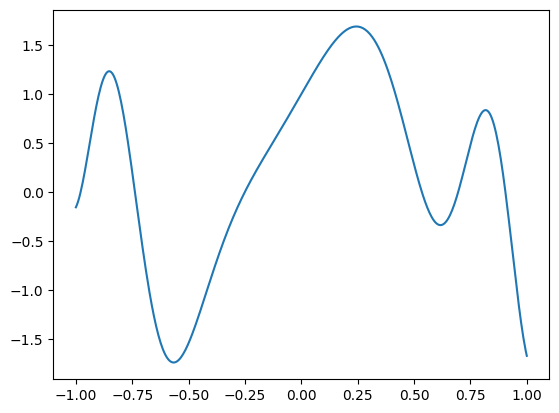

In [17]:
x = np.linspace(-1, 1, 400)

plt.plot(x, np.sin(4*x) + np.cos(9 * x * x))
plt.show()

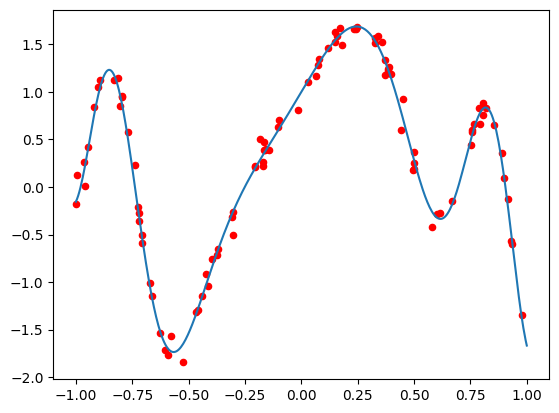

In [18]:
plt.plot(x, np.sin(4*x) + np.cos(9 * x * x))

np.random.seed(1)                                                        # seed the random number generator

n_s = 100                                                                 # number of samples
x_s = np.random.uniform(-1, 1, n_s)                                       # sample x's
y_s = np.sin(4*x_s) + np.cos(9 * x_s * x_s) + 0.1 * np.random.randn(n_s)  # sample y's
plt.scatter(x_s, y_s, color='red', s=20)                                  # plot sample points
plt.show()

Now, we approximate f(x) by a polynomial, using least squares. That is, we will want to find the polynomial coefficients $a_0, a_1, \dots, a_n$ such that
$$y_i \approx a_0 + a_1 x_i + a_2 x_i^2 + \cdots + a_n x_i^n$$

### **First task**
Write a function that given the $x_i$, the $y_i$ and the degree $n$, calculates the coefficients of the polynomial of degree $n$ that best fits the $y_i$ using the normal equations

In [19]:
def least_square_poly_fit(y_s, x_s, n):
    
    # The number of columns of A is n+1
    # The number of coefficients of a polynomial of degree n is n+1
    A = np.zeros((x_s.shape[0], n+1)) 
    
    # Build the matrix A from the data here
    
    return scp.linalg.solve(some_matrix, some_vector)
    

C:\Users\jmcpe\AppData\Local\Temp\ipykernel_32004\2119933958.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=8.62168e-17): result may not be accurate.
  return scp.linalg.solve(A.T @ A, np.dot(A.T, y_s))
C:\Users\jmcpe\AppData\Local\Temp\ipykernel_32004\2119933958.py:6: LinAlgWarning: Ill-conditioned matrix (rcond=1.03061e-19): result may not be accurate.
  return scp.linalg.solve(A.T @ A, np.dot(A.T, y_s))


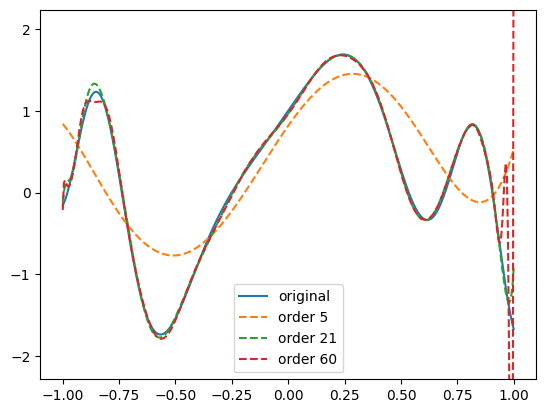

In [20]:
plt.plot(x, np.sin(4*x) + np.cos(9 * x * x), label='original')
ax = plt.gca()
ymin, ymax = ax.get_ylim()

for order in [5, 21, 60]:
    best_poly = least_square_poly_fit(y_s, x_s, order)
    plt.plot(x, np.vander(x, order+1, increasing=True) @ best_poly,'--', label='order ' + str(order))

ax.set_ylim([1.1 * ymin - .1 * ymax, 1.1 * ymax - .1 * ymin])
plt.legend()
plt.show()


#### Did you notice
Did you notice that the best fit is somewhere in the middle? This is a classical problem in statistics!
- If you have too few coefficients, the model is under-parametrized: The model you learn does not have enough parameters to fit well the data 
- If you have too many coefficients, the model is over-parametrized: The model you learn starts to fit the noise!

Did you also notice that the algorithm gave two ill-conditioned errors? It is basically telling us it cannot solve problems with $A$ accurately! 

Well, let's try other thing, see if helps, let us use QR to try and solve the problem:

### **Second task**
Write a function that given the $x_i$, the $y_i$ and the degree $n$, calculates the coefficients of the polynomial of degree $n$ that best fits the $y_i$ using the QR decomposition of A.

In [21]:
def least_square_poly_fit_QR(y_s, x_s, n):
    
    # The number of columns of A is n+1
    # The number of coefficients of a polynomial of degree n is n+1
    A = np.zeros((x_s.shape[0], n+1)) 
    
    # Build the matrix A from the data here
    
    Q, R = scp.linalg.qr(A, mode='economic')
    
    return scp.linalg.solve(some_matrix, some_vector)

C:\Users\jmcpe\AppData\Local\Temp\ipykernel_32004\3056531416.py:8: LinAlgWarning: Ill-conditioned matrix (rcond=1.97898e-18): result may not be accurate.
  return scp.linalg.solve(R, np.dot(Q.T, y_s))


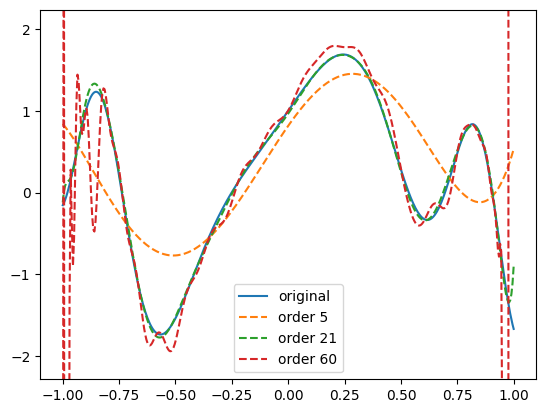

In [22]:
plt.plot(x, np.sin(4*x) + np.cos(9 * x * x), label='original')
ax = plt.gca()
ymin, ymax = ax.get_ylim()

for order in [5, 21, 60]:
    best_poly = least_square_poly_fit_QR(y_s, x_s, order)
    plt.plot(x, np.vander(x, order+1, increasing=True) @ best_poly,'--', label='order ' + str(order))

ax.set_ylim([1.1 * ymin - .1 * ymax, 1.1 * ymax - .1 * ymin])
plt.legend()
plt.show()



Well, we got that down to one Ill-conditioned warning. I'll tell the reason for that later, when we talk about numerical analysis. But, right now, we let's try to use what we know about orthogonal polynomials to solve that last error. We will use Legendre polynomials. Legendre polynomials are defined by the three term recurrence:
$$P_0(x) = 1,\quad P_1(x) = x,\quad (n+1)P_{n+1}(x) = (2 n + 1) x P_n(x) - n P_{n-1}(x).$$




### **Third task**
Write a function that given the $x_i$, the $y_i$ and degree $n$, calculates the coefficients of the degree $n$ polynomial that best fits the $y_i$ in the basis of Legendre Polynomials. That is, find the coefficients $a_0, a_1, \dots, a_n$ such that
$$y_i \approx a_0 P_0(x) + a_1 P_1(x) + a_2 P_2(x) + \cdots + a_n P_n(x)$$
You should use the recurrence above to build $A$ and use the QR decomposition to solve the least squares problem.

In [23]:
def least_square_poly_fit_Legendre(y_s, x_s, n):
    
    # The number of columns of A is n+1
    # The number of coefficients of a polynomial of degree n is n+1
    A = np.zeros((x_s.shape[0], n+1)) 
    
    # Build the matrix A from the data here
    
    Q, R = scp.linalg.qr(A, mode='economic')
    
    return scp.linalg.solve(some_matrix, some_vector)

Fortunately, Numpy has a nice class that allows us to do calculations with polynomials. We shall use it now: 

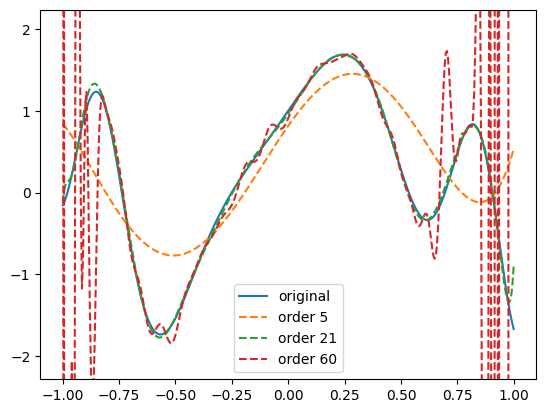

In [24]:
plt.plot(x, np.sin(4*x) + np.cos(9 * x * x), label='original')
ax = plt.gca()
ymin, ymax = ax.get_ylim()

for order in [5, 21, 60]:
    best_poly = least_square_poly_fit_Legendre(y_s, x_s, order)
    plt.plot(x, np.polynomial.legendre.legval(x, best_poly) ,'--', label='order ' + str(order))

ax.set_ylim([1.1 * ymin - .1 * ymax, 1.1 * ymax - .1 * ymin])
plt.legend()
plt.show()

Finally, we do not have condition number errors! But the systems were all equivalent!